# Twitter Sentiment Classification - CLIMATE CHANGE

© Explore Data Science Academy

---
### Honour Code

The members of  {**2207ACDS_TEAMNCW2**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

 ### COLLABORATORS
- ⚡ Emmanuel Obeng Afari - **Ghana**
- ⚡ Maryam Quadri - **South Africa**
- ⚡ Kenechukwu Ozojie - **Nigeria**
- ⚡ Ndinannyi Mukwevho - **Nigeria**
- ⚡ Babajide Adelekan - **Nigeria**
- ⚡ Augustine Okafor - **Nigeria**

### Predict Overview: Predict an individual’s belief in climate change based on their tweets!

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging us during the Classification Sprint with the task of:
- 1. Creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.
- 2. Provide an accurate and robust solution to this task that gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories thus increasing their insights and informing future marketing strategies.
- 3. Employ `Mean F1-Score` evaluation metric for this project
- 4. Build an app using streamlit for our analysis and models and deploy the app on EC2
- 5. Communicate our findings through this notebook and a video conference presentation



<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [5]:
# Libraries for data loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import nltk
import re
#import spacy
%matplotlib inline

# Libraries for data loading, data manipulation and data visulisation
#import *

# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

# Downloads
#nlp = spacy.load('en')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [6]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test_with_no_labels.csv')

In [7]:
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [8]:
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [27]:
#Check shape of datasets
print(f'The shape of the train dataset: {train_df.shape}\nThe shape of the test dataset:  {test_df.shape}')

The shape of the train dataset: (15819, 3)
The shape of the test dataset:  (10546, 2)


### 3.1 Target Variable

In [36]:
# check the unique values in target feature
train_df['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

![SENTIMENTS](../images/sentiments.png)

In [36]:
#check message count grouped by sentiment
sentiment_temp_table = train_df.groupby('sentiment').count()['message'].reset_index().sort_values(by='message')
sentiment_temp_table

,sentiment,message
0,-1,1296
1,0,2353
3,2,3640
2,1,8530


Text(0.5, 0, 'Sentiments')

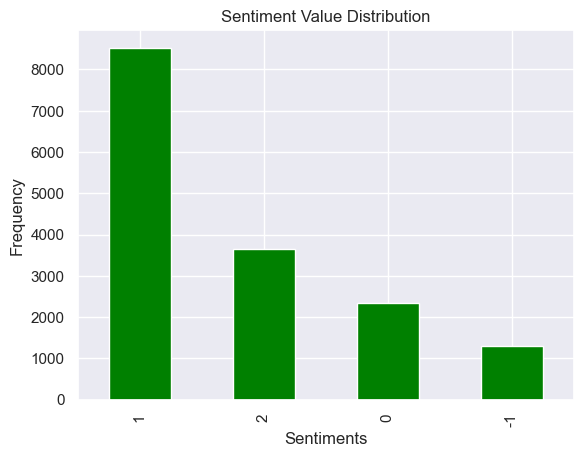

In [35]:
#visualise distribution of each sentiment within the target feature
train_df['sentiment'].value_counts().plot(kind='bar', color='green')
plt.title('Sentiment Value Distribution')
plt.ylabel('Frequency')
plt.xlabel('Sentiments')

In [33]:
#check for null values in both train and test dataset 
print('Train Dataset\n************')
display(train_df.isnull().sum())

print('Test Dataset\n************')
display(test_df.isnull().sum())

Train Dataset
************


sentiment    0
message      0
tweetid      0
dtype: int64

Test Dataset
************


message    0
tweetid    0
dtype: int64

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


### 3.2 Preprocessing

In [46]:
"""def check_top_20_hashtags(train_copy):
    top_20_hashtags = []
    
    for tweet in train_copy:
        hashtag = re.findall(r"#(\w+)", tweet)
        top_20_hashtags.append(hashtag)
        
    top_20_hashtags = sum(top_20_hashtags, [])
    frequency = nltk.FreqDist(top_20_hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(20, columns="count")

    return hashtag_df


#train_copy = train_copy.apply(check_top_20_hashtags)
# Extract hashtags from tweets in each class

pro = check_top_20_hashtags(train_copy['message'][train_copy['sentiment'] == 'Pro'])
anti = check_top_20_hashtags(train_copy['message'][train_copy['sentiment'] == 'Anti'])
neutral = check_top_20_hashtags(train_copy['message'][train_copy['sentiment'] == 'Neutral'])
news = check_top_20_hashtags(train_copy['message'][train_copy['sentiment'] == 'News'])

pro.head()
   """

,hashtag,count


### 3.2 Preprocessing

In [58]:
#convert class from numerical to word definition of class
def class_convert(df):
    
    df = train_df.copy()
    word_class = []
    old_class = df['sentiment']
    
    for class_num in old_class:
        if class_num == 2:
            word_class.append('News')
        elif class_num == 1:
            word_class.append('Pro')
        elif class_num == 0:
            word_class.append('Neutral')
        else:
            word_class.append('Anti')
            
    df['sentiment'] = word_class
        
    return df


In [60]:
train_copy = class_convert(train_df)
train_copy.head(20)

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,Pro,Worth a read whether you do or don't believe i...,425577
6,Pro,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,Pro,RT @makeandmendlife: Six big things we can ALL...,992717
8,Pro,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,Pro,RT @paigetweedy: no offense… but like… how do ...,260471


### Removing Weblinks

In [62]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train_copy['message'] = train_copy['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

train_copy.tail(10)

,sentiment,message,tweetid
15809,News,The quest to capture and store carbon — and sl...,705048
15810,Neutral,This global warming so late in the season is p...,572819
15811,Pro,RT @StephenSchlegel: she's thinking about how ...,426353
15812,Pro,RT @SierraClub: 2016: hottest year in history....,989478
15813,Pro,RT @thinkprogress: EPA head falsely claims car...,442853
15814,Pro,RT @ezlusztig: They took down the material on ...,22001
15815,News,RT @washingtonpost: How climate change could b...,17856
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,Neutral,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


In [ ]:
def data_refine(df, col):
    #remove puntuations
    df[col] = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', df)
    
    #remove numbers
    df[col] = re.sub(r'\d+', '', df) 
    
    #change all characters to lower case
    df[col] =df.lower()
    
    # Remove url's
    df[col] = re.sub(r'https?:\/\/.*\/\w*', '', df)
    
    

In [ ]:
# plot relevant feature interactions


In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic